# 순환 신경망

* 순환 신경망(Recurrent Neural Network)은 시퀀스(seqence) 데이터를 사용합니다. 
* 시퀀스 데이터란 시계열 데이터라고도 합니다.
    * 시점에 따라 데이터가 달라지는 것을 의미합니다. 
    * 텍스트와 같이 순서에 의미가 있는 데이터도 시퀀스 데이터입니다.
* 즉, 특정 시점의 데이터를 한 번에 수집하는 것이 아닌 시간의 흐름에 따라 데이터도 점차 수집하는 것을 의미합니다. 
* 전체 데이터 셋을 구성하는 각 데이터 포인트의 수집 시점이 서로 다릅니다. 

----------
* 지금까지 다룬 신경망은 입력 데이터를 사용한 후 그 결과가 다시 입력층으로 돌아가지는 않았습니다. 
* 즉 한번 출력된 결과는 다시 사용되지 않았습니다. 이를 피드포워드(feedforward) 신경망이라고 합니다. 
* 순환 신경망은 출력된 결과가 다음 시점에서 사용됩니다. 즉 출력 결과를 다음 시점까지 기억했다가 사용하는 방법입니다.

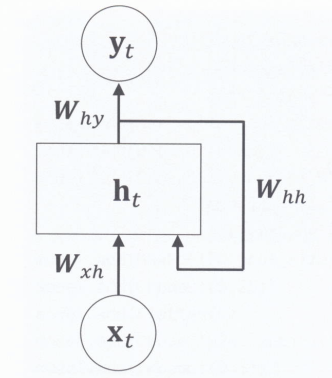

-----------
* 텍스트 데이터는 단어의 순서가 중요한 순차 데이터입니다. 이런 데이터는 순서를 유지하며 신경망에 주입해야 합니다. 
* 단어의 순서를 마구 섞어서 주입하면 안 됩니다. 
* 완전 연결 신경망이나 합성곱 신경망은 이런 기억 장치가 없습니다. 

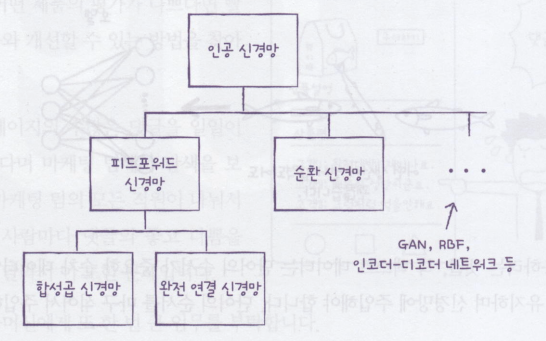

* 다음 샘플을 위해서 이전 데이터가 신경망 층에 순환될 필요가 있습니다. 이런 신경망이 순환 신경망입니다. 

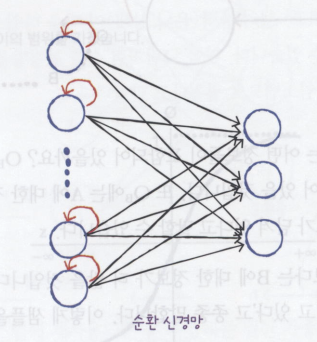

* 완전 연결 신경망(DNN)에 이전 데이터의 처리 흐름을 순환하는 고리 하나만 추가하면 됩니다. 
* 뉴런의 출력이 다시 자기 자신으로 전달됩니다. 즉 어떤 샘플을 처리할 때 바로 이전에 사용했던 데이터를 재사용 합니다. 

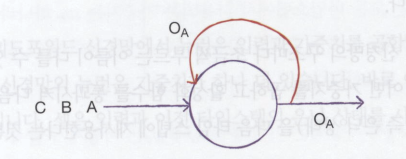

* A, B, C 3개의 샘플을 처리하는 순환 신경망의 뉴런이 있다고 가정해 봅시다. 
* O는 출력된 결과입니다. 
* 위 그림에서 첫 번째 샘플 A를 처리하고 난 출력 ${O_A}$이 다시 뉴런으로 들어갑니다. 
* 이 출력에는 A에 대한 정보가 다분히 들어 있습니다. 그 다음 B를 처리할 때 앞에서 A를 사용해 만든 출력 ${O_A}$를 함께 사용합니다.

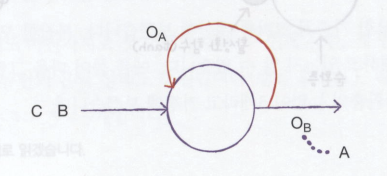

* ${O_A}$와 B를 사용해서 만든 ${O_B}$에는 A에 대한 정보가 어느 정도 포함되어 있을 것입니다. 그 다음 C를 처리할 때는 ${O_B}$를 함께 사용합니다.

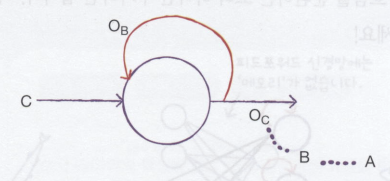

* ${O_B}$를 사용했으므로 당연히 B에 대한 정보가 어느 정도 포함되어 있을 것이며, 또 ${O_B}$에는 A에 대한 정보도 포함되어 있습니다. 
* 따라서 ${O_C}$에 B와 A에 대한 정보가 담겨 있다고 말할 수 있습니다. 
* 물론 ${O_C}$에는 A에 대한 정보보다는 B에 대한 정보가 더 많을 것입니다. 그래서 순환 신경망에서는 '이전 샘플에 대한 기억을 가지고 있다'고 종종 말합니다. 
* 이렇게 샘플을 처리하는 한 단계를 타임스텝(timestep)이라고 말합니다. 
* 순환 신경망은 이전 타임스템의 샘플을 기억하지만 타임스텝이 오래될수록 순환되는 정보는 희미해집니다. 

------------
* 순환 신경망에서는 특별히 층을 셀(cell)이라고 부릅니다. 한 셀에는 여러 개의 뉴런이 있지만 완전 연결 신경망과 달리 뉴런을 모두 표시하지 않고(표시하려면 매우 복잡함) 하나의 셀로 층을 표현합니다. 
* 또 셀의 출력을 은닉 상태(hidden state)라고 부릅니다. 

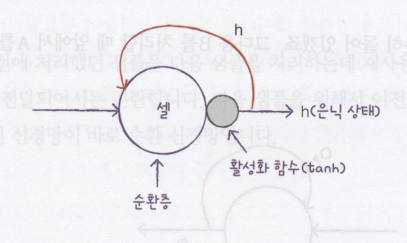

* 입력에 어떤 가중치를 곱하고 활성화 함수를 통과시켜 다음 층으로 보내는 구조는 같음
* 달라지는 것은 층의 출력(즉 은닉상태)을 다음 타임스텝에서 재사용한다는 것입니다.

### 순환 신경망의 활성화 함수
* 일반적으로 은닉층의 활성화 함수로 하이퍼볼릭 탄젠트 함수인 tanh가 많이 사용됩니다.(경험의 누적으로 가장 좋다고 알려져 있어 많이 사용함) 

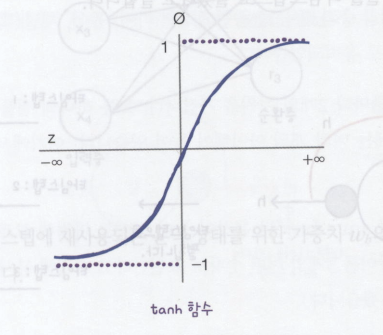

* 순환 신경망 그림에서 번거로움을 피하기 위해 활성화 함수를 따로 표기하지 않습니다. 하지만 순환 신경망에도 활성화 함수가 반드시 필요하다는 것을 꼭 기억해주세요 

### 순환 신경망 구조

-------
* 순환 신경망의 뉴런은 가중치가 하나 더 있습니다. 바로 이전 타임스텝의 은닉 상태에 곱해지는 가중치입니다. 
* 셀은 입력과 이전 타임스텝의 은닉 상태를 사용하여 현재 타임스텝의 은닉 상태를 만듭니다. 

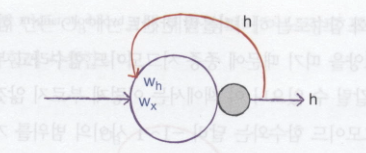

* 위의 그림에서 2개의 가중치를 셀 안에 구분해서 표시하였습니다. ${w_x}$는 입력에 곱해지는 가중치이고 ${w_b}$는 이전 타임스텝의 은닉 상태에 곱해지는 가중치입니다. 피드포워드 신경망과 마찬가지로 뉴런마다 하나의 절편이 포함되어 있지만 따로 표기하지 않습니다.

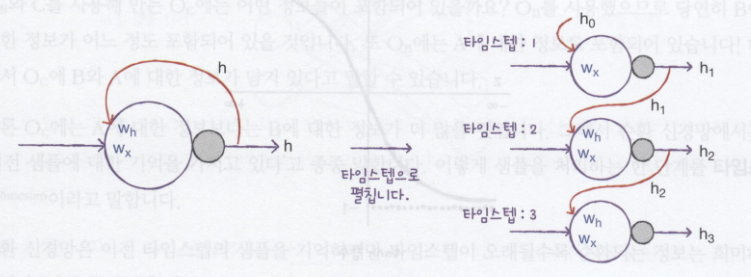

* 셀의 출력(은닉 상태)이 다음 타임스텝에 재사용되기 때문에 타임스텝으로 셀을 나누어 그릴수 있습니다. 
* 위의 그림을 보고 셀을 타임스텝으로 펼쳤다고 합니다. 
-----
* 타임스텝 1에서 셀의 출력 ${h_1}$이 타임스텝 2의 셀로 주입됩니다. 이때 ${w_h}$와 곱해집니다. 
* 마찬가지로 타임스텝 2에서 셀의 출력 ${h_2}$가 타임스텝 3의 셀로 주입됩니다. 이때에도 ${w_h}$와 곱해집니다.
----------
* 여기에서 알 수 있는 것은 모든 타임스텝에서 사용되는 가중치는 ${w_h}$하나라는 점입니다. 
* 가중치 ${w_h}$는 타임스텝에 따라 변화되는 뉴런의 출력을 학습합니다.
* 맨 처음 타임스텝 1에서 사용되는 이전 은닉 상태 ${h_0}$은 입력할 이전 타임스텝이 없기 때문에 0으로 초기화합니다.

## 셀의 가중치와 입출력
* 순환 신경망의 셀에서 필요한 가중치 크기를 계산해보겠습니다. 
* 예를 들어 다음 그림처럼 순환층에 입력되는 특성의 개수가 4개이고 순환층의 뉴런이 3개라고 가정해보겠습니다. 
* ${w_x}$의 크기를 구해 보겠습니다. 
    * 입력층과 순환층의 뉴런이 모두 완전 연결되기 때문에 가중치 ${w_x}$의 크기는 4 x 3 = 12가 됩니다. 

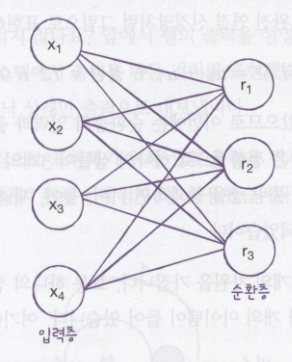

* 순환층에서 다음 타임스텝에서 재사용되는 은닉 상태를 위한 가중치 ${w_h}$의 크기는?

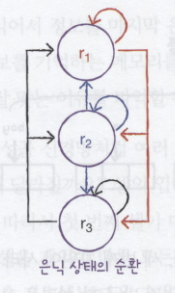

* 순환층에 있는 첫 번째 뉴런 ${r_1}$은 은닉 상태가 다음 타임스텝에 재사용될 때 첫 번째 뉴런과 두 번재 뉴런, 세 번째 뉴런에 모두 전달됩니다. 
* 그림에서 붉은색 표시 
* 이전 타임스텝의 은닉 상태는 다음 타임스텝의 뉴런에 완전히 연결됩니다.

* 두 번째 뉴런의 은닉 상태도 마찬가지로 첫 번째 뉴런과 두 번째 뉴런, 세 번째 뉴런에 모두 전달되고 (파란색 화살표)
* 세 번째 뉴런의 은닉 상태도 동일합니다.(검은 화살표)

* 이 순환층에서 은닉 상태를 위한 가중치 ${w_b}$는 3 x 3 = 9개입니다.
* 따라서 이 순환층은 모두 12 + 9 + 3 = 24개의 모델 파라미터를 가집니다.
    * 편향을 가지기 때문에 3를 더해줍니다.

-----
* 순환층은 일반적으로 샘플마다 2개의 차원을 가집니다. 보통 하나의 샘플을 하나의 시퀀스라고 말합니다. 
* 시퀀스 안에는 여러 개의 아이템이 들어 있습니다. 여기에서 시퀀스의 길이가 바로 타임스텝 길이가 됩니다.
* 예) I am a boy란 문장이 들어 있다고 가정해 봅시다. 
    * 이 샘플은 4개의 단어로 이루어져 있습니다.(타임스텝 크기)
    * 샘플은 1이며, 각 단어는 3개의 벡터(단어 표현방식)로 이루어져 있습니다. 
    * (1, 4, 3)

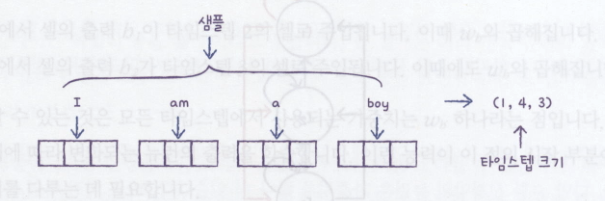

* 입력이 순환층을 통과하면 두 번째, 세 번째 차원이 사라지고 순환층의 뉴런 개수만큼 출력됩니다. 

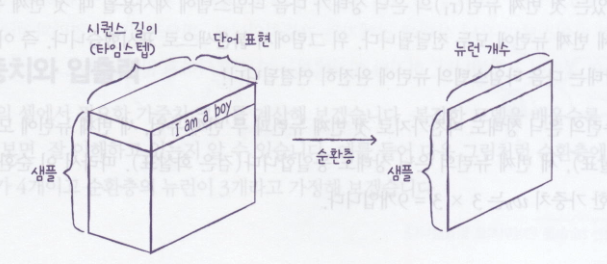

* 하나의 샘플은 시퀀스 길이(여기에서는 단어 개수)와 단어 표현(워드 임베딩)의 2차원 배열입니다. 
* 순환층을 통과하면 1차원 배열로 바뀝니다. 이 1차원 배열의 크기는 순환층의 뉴런 개수에 의해 결정됩니다.
* 순환층은 기본적으로 마지막 타임스텝의 은닉 상태만 출력으로 내보냅니다. 
* 샘플이 커지면 컴퓨터가 힘들어하고, 그만큼 컴퓨터에 영향을 많이 줌

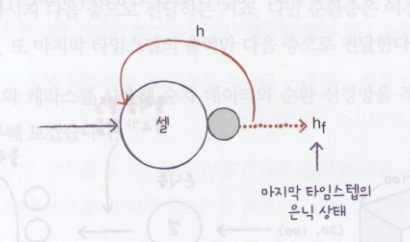

* 입력된 시퀀스 길이를 모두 읽어서 정보를 마지막 은닉 상태에 압축하여 전달하는 것처럼 볼 수 있습니다.
* 이제 순환 신경망이 정보를 기억하는 메모리를 가진다고 표현하는지 이해할 수 있습니다. 또 순환 신경망이 순차 데이터에 잘 맞는 이유를 파악할 수 있습니다.


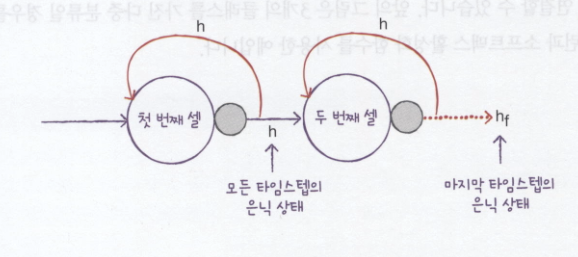

* 순환 신경망도 완전 연결 신경망이나 합성곱 신경망처럼 여러 개의 층으로 쌓을 수 있습니다. 
* 첫 번째 셀은 모든 타임스텝의 은닉 상태를 출력하고, 두 번째 셀은 마지막 타임스텝의 은닉 상태만 출력합니다. 

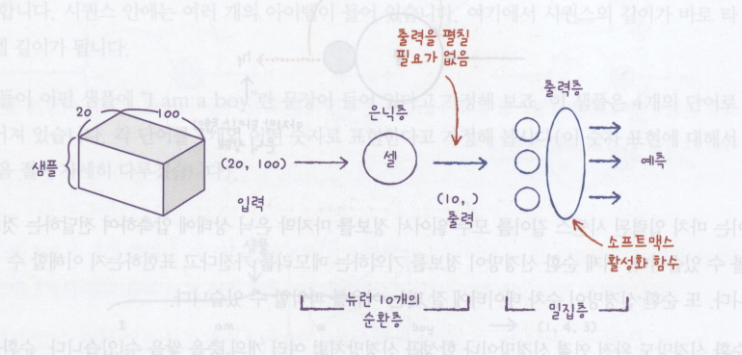

* 출력증의 구성에 대해 알아보겠습니다. 
* 합성곱 신경망과 마찬가지로 순환 신경망도 마지막에는 밀집층을 두어 클래스를 분류합니다. 
    * 다중 분류 -> 출력층에 클래스 개수만큼 뉴런을 두고 소프트맥스 활성화 함수를 사용
    * 이진 분류일 경우에는 하나의 뉴런을 두고 시그모이드 활성화 함수 사용

* 마지막 셀의 출력이 1차원이기 때문에 Flatten 클래스로 펼칠 필요 없이 바로 출력층에 연결할 수 있습니다. 
* 위의 그림은 3개의 클래스를 가진 다중 분류일 경우를 위해 출력층에 3개의 뉴런과 소프트맥스 활성화 함수를 사용한 예입니다.

## 확인문제

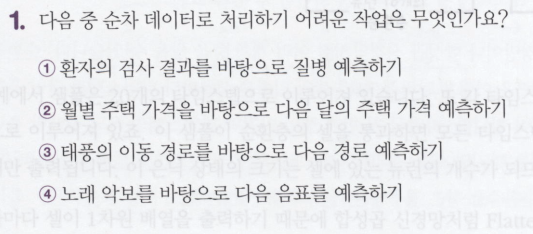

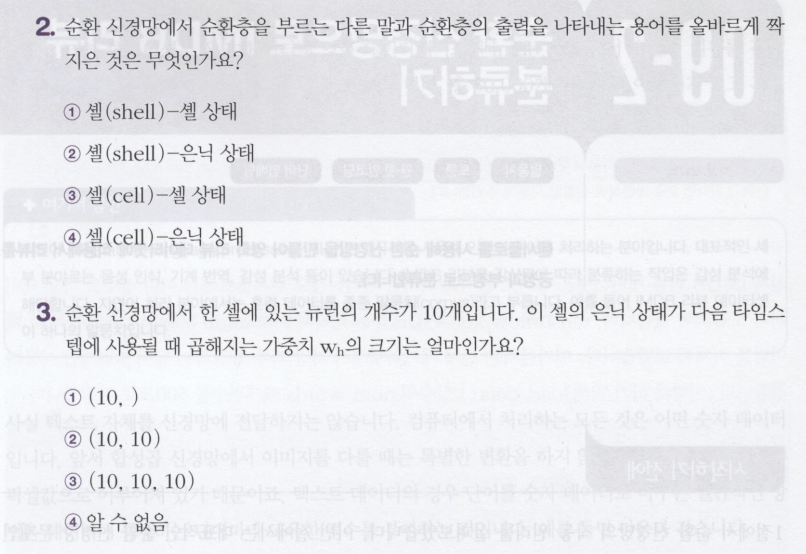

# RNN 실습

### IMDB 리뷰 데이터셋
* 영화 데이터베이스인 imdb.com에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 데이터셋 
* 총 50,000개의 샘플로 이루어져 있고 훈련 데이터와 테스트 데이터에 각각 25,000개씩 나누어져 있습니다.
----
* 자연어 처리 분야에서는 훈련 데이터를 말뭉치(corpus)라고 부릅니다. 

* 텍스트 자체를 신경망에 전달하지는 않습니다. 컴퓨터에서 처리하는 모든 것은 어떤 숫자 데이터입니다. 
* 앞서 합성곱 신경망에서 이미지를 다룰 때는 특별한 변환을 하지 않았습니다. 이미지는 픽셀값으로 이루어져 있기 때문입니다. 
* 텍스트 데이터의 경우 단어를 숫자 데이터로 바꾸는 일반적인 방법은 데이터에 등장하는 단어마다 고유한 정수를 부여하는 것입니다. 

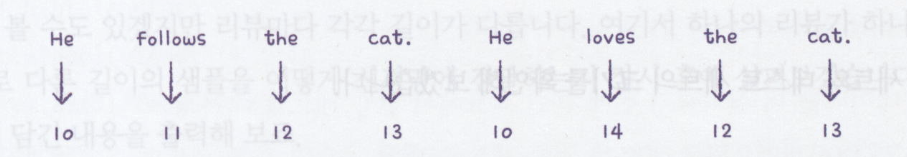

* 이렇게 분리된 단어를 토큰(token)이라고 부릅니다. 하나의 샘플은 여러 개의 토큰으로 이루어져 있고 1개의 토큰이 하나의 타임스탬프에 해당합니다. 

In [2]:
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [3]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


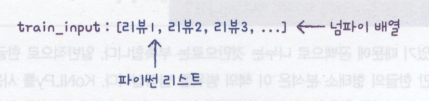

* IMDB 리뷰 텍스트는 길이가 제각각입니다. 따라서 고정 크기의 2차원 배열에 담기보다는 리뷰마다 별도의 파이선 리스트로 담아야 메모리를 효율적으로 사용할 수 있습니다. 
* 아래처럼 리뷰의 길이를 출력해보면 다른 길이를 가진 것을 확인할 수 있습니다.

In [4]:
print(len(train_input[0]))

218


In [5]:
print(len(train_input[1]))

189


* 첫번째 리뷰에 담긴 내용을 출력해 보겠습니다.
* num_words = 500으로 지정했기 때문에 어휘 사전에는 500개의 단어만 들어가 있습니다. 따라서 어휘 사전에 없는 단어는 모두 2로 표시됩니다.
    * 500개의 단어는 빈도수 기준으로..

In [6]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [7]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [8]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [9]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [11]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [12]:
print(np.mean(lengths), np.median(lengths))

237.9088125 179.0


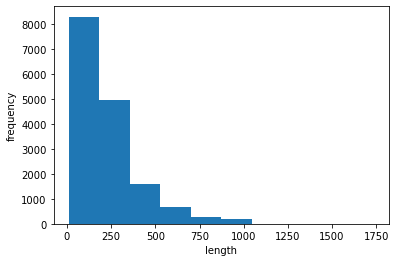

In [13]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

* 리뷰 데이터를 길이가 100이 되도록 잘라내거나 0으로 패딩
* pad_sequences() 함수가 제공
* 길이를 100으로 설정

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [21]:
val_seq = pad_sequences(val_input, maxlen=100)

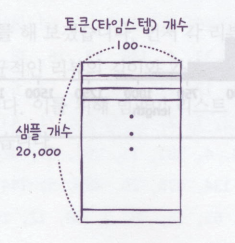

In [26]:
print (train_seq.shape)

(16000, 100)


In [27]:
print(train_seq[0])

[ 18  53  10  10  14   2   2  19   2   2   6 255  37   2  17   6   2   8
   2   6   2 198   2  19   2   2   2  19   2   2  39   4   2  14   2   8
   2   2   6   2   2   2   5  35   2   2   2  34   6   2   2   4   2   2
   5   2   2   2   2  11   6   2 277  18  14   2   2   7 108  10  10  24
 179  17   2   5   2  17   4   2 173 241   7   4 201  21 131  87  18 451
   7   2   2   5   2   2 405 108   2 158]


In [28]:
print(train_input[0][-10:])

[7, 2, 2, 5, 2, 2, 405, 108, 2, 158]


* 데이터가 길이보다 작다면 0으로 패딩합니다.

* 데이터를 확인해보면 maxlen보다 긴 시퀀스의 앞부분을 자릅니다. 이렇게 하는 이유는 일반적으로 시퀀스의 뒷부분의 정보가 더 유용하리라 기대하기 때문입니다. 
* 뒷부분을 자르고 싶다면 truncating 매개변수의 값을 기본값 pre가 아닌 post로 바꾸면 됩니다. 

## 순환 신경망 만들기

In [15]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [16]:
train_oh = keras.utils.to_categorical(train_seq)

In [17]:
print(train_oh.shape)

(16000, 100, 500)


In [18]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [19]:
print(np.sum(train_oh[0][0]))

1.0


In [22]:
val_oh = keras.utils.to_categorical(val_seq)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


### 훈련하기

In [24]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
250/250 [==============================] - 20s 74ms/step - loss: 0.6993 - accuracy: 0.5002 - val_loss: 0.6938 - val_accuracy: 0.5060
Epoch 2/100
250/250 [==============================] - 20s 78ms/step - loss: 0.6946 - accuracy: 0.5065 - val_loss: 0.6924 - val_accuracy: 0.5160
Epoch 3/100
250/250 [==============================] - 17s 69ms/step - loss: 0.6929 - accuracy: 0.5141 - val_loss: 0.6915 - val_accuracy: 0.5242
Epoch 4/100
250/250 [==============================] - 17s 70ms/step - loss: 0.6916 - accuracy: 0.5197 - val_loss: 0.6909 - val_accuracy: 0.5293
Epoch 5/100
250/250 [==============================] - 17s 70ms/step - loss: 0.6903 - accuracy: 0.5292 - val_loss: 0.6902 - val_accuracy: 0.5337
Epoch 6/100
250/250 [==============================] - 18s 71ms/step - loss: 0.6892 - accuracy: 0.5337 - val_loss: 0.6896 - val_accuracy: 0.5370
Epoch 7/100
250/250 [==============================] - 18s 72ms/step - loss: 0.6880 - accuracy: 0.5412 - val_loss: 0.6891 - val_ac